In [1]:
# bitsandbytes package might throw an error. Uninstall bitsandbytes package if not needed
from diffusers import StableDiffusionPipeline, DiffusionPipeline, DPMSolverMultistepScheduler
import torch
import time

In [2]:
# model_id = "stabilityai/stable-diffusion-xl-base-1.0"
model_id = "CompVis/stable-diffusion-v1-4"
# model_id = "nitrosocke/Ghibli-Diffusion"

if torch.cuda.is_available():
  device="cuda"
elif torch.xpu.is_available():
  device="xpu"
else:
  device="cpu"

print("Using device: ", device)
if model_id == "stabilityai/stable-diffusion-xl-base-1.0":
    pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)

elif model_id == "nitrosocke/Ghibli-Diffusion" or model_id == "runwayml/stable-diffusion-v1-5":
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

elif model_id == "CompVis/stable-diffusion-v1-4" or model_id == "stabilityai/stable-diffusion-2-1":
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

else:
    raise ValueError("the given model id is not supported currently.")

pipe = pipe.to(device)

Using device:  xpu


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

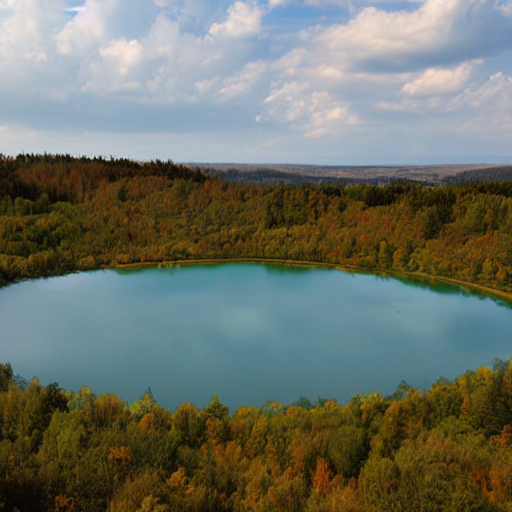

In [3]:
prompt = "HD quality detailed lake covered under sky."
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: total: 1min 6s
Wall time: 1min 6s


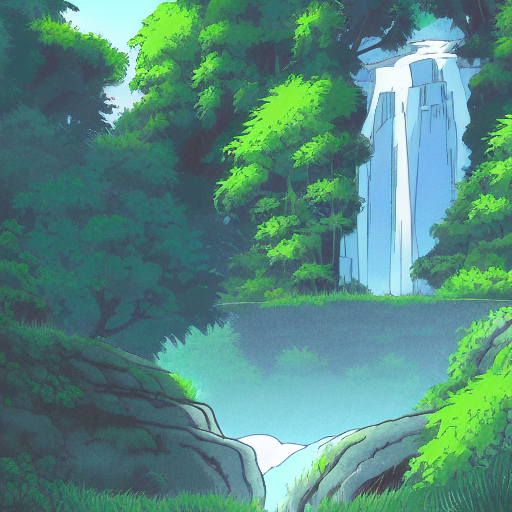

In [4]:
%%time
prompt = "Mystical waterfall surrounded by trees drawn in a Studio Ghibli style"
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: total: 1min 6s
Wall time: 1min 6s


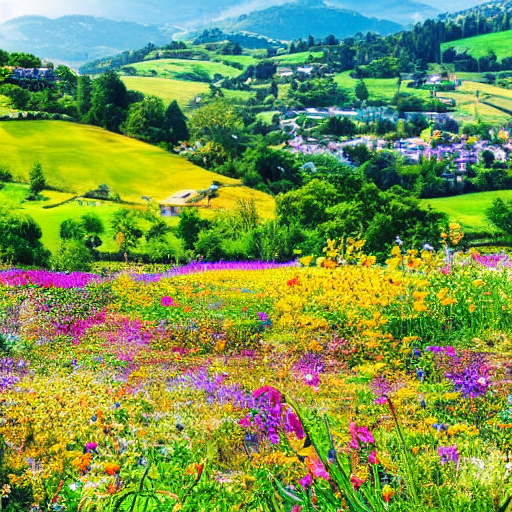

In [5]:
%%time
prompt = "A peaceful village surrounded by rolling hills and vibrant flowers, with a soft, dreamy atmosphere"
pipe(prompt).images[0]